In [1]:
#Q1.1
def reachable_nodes_excluding_root(k, t):
    if k <= 2:
        return "k must be greater than 2"
    return k * ((k - 1)**t - 1) // (k - 2)

#Q1.2
import math

def cayley_degree_distribution(k: int, P: int) -> dict:
    """
    Computes the degree distribution of a Cayley tree with branching factor k and depth P.

    Parameters:
    k (int): Branching factor (number of children per non-leaf node).
    P (int): Depth of the tree.

    Returns:
    dict: Probability distribution of node degrees.
    """
    if k <= 2:
        raise ValueError("k must be greater than 2 for a valid Cayley tree.")

    # Compute total number of nodes
    total_nodes = 1 + k * ((k - 1)**P - 1) // (k - 2)
    
    # Compute number of leaf nodes (nodes at depth P)
    leaf_nodes = k * ((k - 1)**(P - 1))
    
    # Compute number of internal nodes (all nodes excluding leaves and the root)
    internal_nodes = total_nodes - leaf_nodes - 1
    
    # Compute probability of each degree type
    P_1 = leaf_nodes / total_nodes  # Probability of degree = 1 (leaf nodes)
    P_k_internal = internal_nodes / total_nodes  # Probability of degree = k (internal nodes)
    P_k_root = 1 / total_nodes  # Probability of degree = k (root node)

    return {
        "P(1) (Leaf Nodes)": P_1,
        "P(k) (Internal Nodes)": P_k_internal,
        "P(k) (Root Node)": P_k_root
    }
    
#Q1.3
def cayley_tree_diameter(P: int) -> int:
    """
    Computes the diameter of a (k, P) Cayley tree.

    Parameters:
    P (int): Depth of the tree.

    Returns:
    int: The diameter of the tree.
    """
    if P < 1:
        raise ValueError("Depth P must be at least 1.")

    return 2 * P

#Q1.4
import math

def cayley_tree_diameter_from_N(N: int, k: int) -> float:
    """
    Computes the diameter of a (k, P) Cayley tree in terms of the total number of nodes N.

    Parameters:
    N (int): Total number of nodes in the tree.
    k (int): Branching factor (number of children per non-leaf node).

    Returns:
    float: The diameter of the tree.
    """
    if k <= 2:
        raise ValueError("k must be greater than 2 for a valid Cayley tree.")
    if N <= 1:
        raise ValueError("N must be greater than 1.")

    # Compute the depth P using logarithm
    P = math.log(((N - 1) * (k - 2)) / k + 1, k - 1)

    # Compute the diameter
    return 2 * P

In [1]:
#Q2.1
import networkx as nx

def build_graph(cities_file='global-cities.dat', network_file='global-net.dat'):
    """
    Build and return an undirected graph from the air traffic network data.

    :param cities_file:    Path to the 'global-cities.dat' file
    :param network_file:   Path to the 'global-net.dat' file
    :return:               A NetworkX undirected Graph (G)
    """
    G = nx.Graph()
    node_dict = {}  # Dictionary to store node info

    # Step 1: Parse global-cities.dat to add nodes
    with open(cities_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split('|')
            if len(parts) == 3:
                code = parts[0]  
                node_id = int(parts[1])  # Convert node ID to integer
                city_name = parts[2] 

                # Store attributes in dictionary for reference
                node_dict[node_id] = {'code': code, 'city': city_name}
                
                # Add node to graph
                G.add_node(node_id, code=code, city=city_name)

    print(f"Loaded {len(node_dict)} cities from {cities_file}.")

    # Step 2: Parse global-net.dat to add edges
    with open(network_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 2:
                try:
                    node1, node2 = int(parts[0]), int(parts[1])  # Convert to integers
                    G.add_edge(node1, node2)
                except ValueError:
                    print(f"⚠️ Skipping invalid line: {line}")

    print(f"Loaded {G.number_of_edges()} edges from {network_file}.")

    # Step 3: Ensure all city nodes are in the graph (even if they have no edges)
    for node_id in node_dict.keys():
        if node_id not in G:
            G.add_node(node_id, **node_dict[node_id])  # Add isolated node

    print(f"Final Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")

    return G

# Example Usage
G = build_graph("global-cities.dat", "global-net.dat")


Loaded 3883 cities from global-cities.dat.
Loaded 14142 edges from global-net.dat.
Final Graph: 3883 nodes, 14142 edges.


In [3]:
#Q2.2
def connected_components_info(G: nx.Graph):
    """
    Finds the number of connected components and the size of the largest component
    (both in terms of nodes and edges).
    """
    components = list(nx.connected_components(G))
    num_components = len(components)
    largest_component_nodes = max(components, key=len)

    # Create subgraph for the largest component
    G_largest = G.subgraph(largest_component_nodes)

    print(f"Number of connected components: {num_components}")
    print(f"Largest component size: {G_largest.number_of_nodes()} nodes")
    print(f"Largest component edges: {G_largest.number_of_edges()} edges")

    return G_largest

# Compute the largest component
G_largest = connected_components_info(G)


Number of connected components: 266
Largest component size: 3618 nodes
Largest component edges: 14142 edges


In [4]:
#Q2.3
import networkx as nx

def load_airport_mapping(nodes_file: str) -> dict:
    """
    Loads a mapping of airport node IDs to airport names from the dataset.

    Parameters:
    nodes_file (str): Path to the node data file.

    Returns:
    dict: A dictionary mapping airport IDs (integers) to airport names (strings).
    """
    airport_mapping = {}
    with open(nodes_file, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("|")  # Adjust delimiter if necessary
            if len(parts) >= 3:  # Ensure at least 3 columns
                try:
                    airport_id = int(parts[1])  # Second column is the node ID
                    airport_name = parts[2].strip()  # Third column is the airport name
                    airport_mapping[airport_id] = airport_name
                except ValueError:
                    continue  # Skip invalid lines
    return airport_mapping

def get_largest_component(G: nx.Graph) -> nx.Graph:
    """
    Extracts the largest connected component from the air traffic network.

    Parameters:
    G (nx.Graph): The full air traffic network.

    Returns:
    nx.Graph: The largest connected component.
    """
    largest_cc = max(nx.connected_components(G), key=len)  # Find largest component
    G_largest = G.subgraph(largest_cc).copy()  # Create a subgraph
    return G_largest

def top_airports_by_degree(G: nx.Graph, airport_mapping: dict, num_top: int = 10):
    """
    Finds the top N airports by degree in the largest component and replaces node IDs with airport names.

    Parameters:
    G (nx.Graph): The largest connected component.
    airport_mapping (dict): Dictionary mapping node IDs to airport names.
    num_top (int): Number of top airports to return.

    Returns:
    List of tuples (airport_name, degree).
    """
    degree_dict = dict(G.degree())
    top_airports = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:num_top]

    # Replace node IDs with airport names
    top_airports_named = [(airport_mapping.get(airport, f"Unknown {airport}"), degree) for airport, degree in top_airports]

    print("\nTop 10 airports in the largest component by degree:")
    for airport_name, degree in top_airports_named:
        print(f"Airport: {airport_name}, Degree: {degree}")

    return top_airports_named

# Load the graph
edges_file = "global-net.dat" 
G = nx.read_edgelist(edges_file, nodetype=int)

# Load the airport mapping
nodes_file = "global-cities.dat"
airport_mapping = load_airport_mapping(nodes_file)

# Extract the largest connected component
G_largest = get_largest_component(G)

# Get top 10 airports in the largest component by degree
top_airports_named = top_airports_by_degree(G_largest, airport_mapping)



Top 10 airports in the largest component by degree:
Airport: Paris, Degree: 250
Airport: London (GB), Degree: 242
Airport: Frankfurt, Degree: 237
Airport: Amsterdam, Degree: 192
Airport: Moscow, Degree: 186
Airport: Chicago, Degree: 184
Airport: New York, Degree: 179
Airport: Atlanta, Degree: 172
Airport: Dallas/Fort Worth, Degree: 147
Airport: Houston, Degree: 144


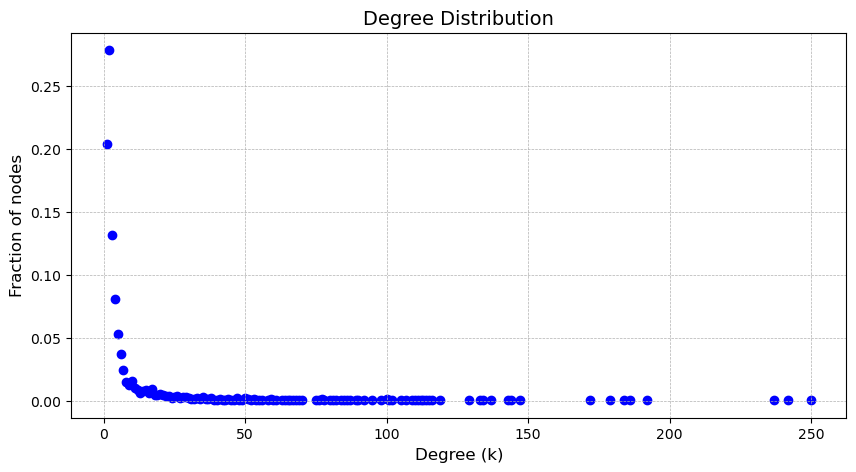

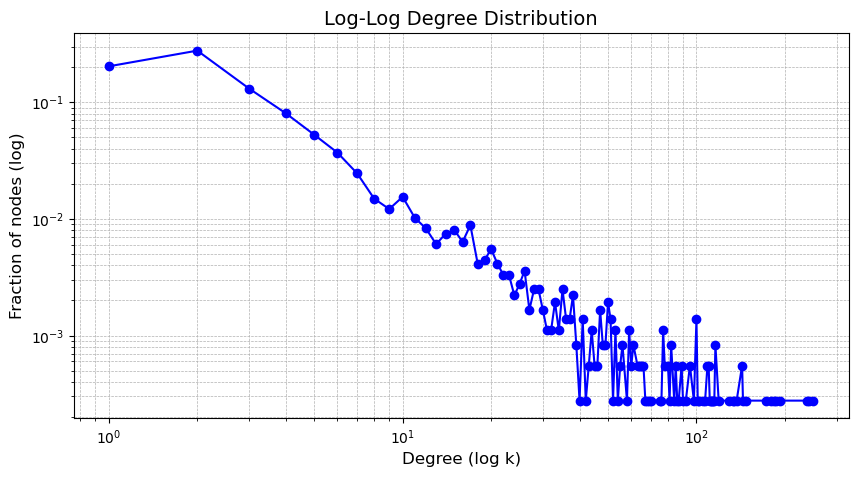

In [5]:
#Q2.4
import matplotlib.pyplot as plt
import numpy as np

def plot_degree_distribution(G: nx.Graph):
    """
    Plots the degree distribution and log-log degree distribution of the network.

    The first plot shows the degree distribution on a linear scale.
    The second plot shows the degree distribution on a log-log scale with base 10.

    Parameters:
    G (nx.Graph): The network graph.
    """

    # Compute degree distribution
    degrees = [d for _, d in G.degree()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    # Compute fraction of nodes with each degree
    fraction = counts / len(degrees)

    # Restrict x to the min-max range
    min_x, max_x = min(unique_degrees), max(unique_degrees)
    valid_indices = (unique_degrees > 0) & (fraction > 0)  # Remove zero entries
    unique_degrees, fraction = unique_degrees[valid_indices], fraction[valid_indices]

    # Linear scale plot
    plt.figure(figsize=(10, 5))
    plt.scatter(unique_degrees, fraction, color='b', marker='o')
    plt.xlabel("Degree (k)", fontsize=12)
    plt.ylabel("Fraction of nodes", fontsize=12)
    plt.title("Degree Distribution", fontsize=14)

    # Explicitly set tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.savefig("Degree Distribution_linear.png", dpi=300, bbox_inches="tight")  # Save image
    plt.show()  # Display the plot
    plt.close()  # Close figure to prevent display issues

    
    # Log-Log scale plot
    plt.figure(figsize=(10, 5))
    plt.loglog(unique_degrees, fraction, 'bo-', base=10)  # Use base 10 log scale
    plt.xlabel("Degree (log k)", fontsize=12)
    plt.ylabel("Fraction of nodes (log)", fontsize=12)
    plt.title("Log-Log Degree Distribution", fontsize=14)

    # Explicitly set tick labels
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.savefig("Degree Distribution_loglog.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# Call the function using the largest connected component
plot_degree_distribution(G_largest)


In [6]:
#Q2.5
import networkx as nx
import matplotlib.pyplot as plt

def load_airport_mapping(nodes_file: str) -> dict:
    """
    Loads a mapping of airport node IDs to airport names from the dataset.
    """
    airport_mapping = {}
    with open(nodes_file, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("|")  # Adjust delimiter if necessary
            if len(parts) >= 3:
                try:
                    airport_id = int(parts[1])
                    airport_name = parts[2].strip()
                    airport_mapping[airport_id] = airport_name
                except ValueError:
                    continue
    return airport_mapping

def get_giant_component(G: nx.Graph) -> nx.Graph:
    """
    Extracts the largest connected component from the air traffic network.
    """
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc).copy()

def compute_diameter_and_longest_path(G: nx.Graph, airport_mapping: dict):
    """
    Computes the unweighted diameter of the largest component and finds the longest shortest path between two airports.
    """
    diameter = nx.diameter(G)
    periphery_nodes = nx.periphery(G)
    
    # Find the longest shortest path between any two periphery nodes
    max_distance = 0
    best_pair = (None, None)
    for i in range(len(periphery_nodes)):
        for j in range(i + 1, len(periphery_nodes)):
            path = nx.shortest_path(G, source=periphery_nodes[i], target=periphery_nodes[j])
            if len(path) > max_distance:
                max_distance = len(path)
                best_pair = (periphery_nodes[i], periphery_nodes[j])
    
    path_cities = [airport_mapping.get(node, f"Unknown {node}") for node in nx.shortest_path(G, source=best_pair[0], target=best_pair[1])]
    
    return diameter, path_cities

# File paths (update with actual file paths)
nodes_file = "global-cities.dat"
edges_file = "global-net.dat"

G = nx.read_edgelist(edges_file, nodetype=int)
airport_mapping = load_airport_mapping(nodes_file)
G_largest = get_giant_component(G)

diameter, longest_path = compute_diameter_and_longest_path(G_largest, airport_mapping)

print(f"Unweighted Diameter of Giant Component: {diameter}")
print("Longest Shortest Path Between Two Cities:")
print(" → ".join(longest_path))

Unweighted Diameter of Giant Component: 17
Longest Shortest Path Between Two Cities:
Brize Norton → Georgetown (XV) → Mount Pleasant → Punta Arenas → Concepcion (CL) → Santiago (CL) → Buenos Aires → Auckland → Brisbane → Port Moresby → Lae → Indagen → Konge → Kabwum → Satwag → Derim → Yalumet → Wasu


In [7]:
#Q2.6
import networkx as nx

def load_airport_mapping(filename):
    """
    Loads the airport mapping from a dataset file.

    Parameters:
    filename (str): Path to the airport dataset file.

    Returns:
    tuple: (airport_mapping, reverse_mapping)
        - airport_mapping: Dict mapping airport codes to node IDs.
        - reverse_mapping: Dict mapping node IDs to city/airport names.
    """
    airport_mapping = {}
    reverse_mapping = {}

    with open(filename, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("|")
            if len(parts) == 3:
                airport_code, node_id, airport_name = parts
                node_id = int(node_id)  # Convert node ID to integer
                airport_mapping[airport_code] = node_id
                reverse_mapping[node_id] = airport_name

    return airport_mapping, reverse_mapping


def find_shortest_path(G: nx.Graph, source: str, target: str, airport_mapping: dict, reverse_mapping: dict):
    """
    Finds the shortest path between two airports in the air traffic network.

    Parameters:
    G (nx.Graph): The air traffic network graph.
    source (str): Source airport code (e.g., "CBR" for Canberra).
    target (str): Target airport code (e.g., "CPT" for Cape Town).
    airport_mapping (dict): Dictionary mapping airport codes to node IDs.
    reverse_mapping (dict): Dictionary mapping node IDs to airport names.

    Returns:
    list: The sequence of airport names in the shortest path.
    """

    if source not in airport_mapping or target not in airport_mapping:
        raise ValueError("One or both airport codes are not in the dataset.")

    source_id = airport_mapping[source]
    target_id = airport_mapping[target]

    try:
        # Find the shortest path in terms of node IDs
        path = nx.shortest_path(G, source=source_id, target=target_id)

        # Convert node IDs to airport names
        path_airports = [reverse_mapping.get(node, f"Unknown({node})") for node in path]

        print(f"Shortest path from {source} to {target}:")
        print(" → ".join(path_airports))
        print(f"Number of flights required: {len(path) - 1}")

        return path_airports

    except nx.NetworkXNoPath:
        print(f"No path found between {source} and {target}.")
        return None


# Load the dataset
airport_mapping, reverse_mapping = load_airport_mapping("global-cities.dat")

# Load the air traffic network graph
edges_file = "global-net.dat"
G = nx.read_edgelist(edges_file, nodetype=int)

# Get the shortest path with city/airport names
shortest_path_airports = find_shortest_path(G, "CBR", "CPT", airport_mapping, reverse_mapping)


Shortest path from CBR to CPT:
Canberra → Melbourne (AU) → Mauritius → Cape Town
Number of flights required: 3


In [ ]:
#Q2.7
import networkx as nx

def compute_betweenness_centrality(G: nx.Graph, airport_mapping: dict, reverse_mapping: dict, num_top: int = 10):
    """
    Computes the betweenness centrality of each airport and identifies the most central ones.

    Parameters:
    G (nx.Graph): The air traffic network graph.
    airport_mapping (dict): Dictionary mapping airport codes to node IDs.
    reverse_mapping (dict): Dictionary mapping node IDs to airport names.
    num_top (int): Number of top airports to return.

    Returns:
    list: List of tuples (airport name, betweenness centrality score).
    """

    print("Computing betweenness centrality... This may take a while for large graphs.")

    # Compute betweenness centrality
    centrality = nx.betweenness_centrality(G)

    # Sort airports by betweenness centrality (descending order)
    top_airports = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:num_top]

    # Convert node IDs to airport names
    top_airports_with_names = [(reverse_mapping.get(node, f"Unknown({node})"), score) for node, score in top_airports]

    # Print results
    print("\nTop 10 airports by betweenness centrality:")
    for airport, centrality_score in top_airports_with_names:
        print(f"Airport: {airport}, Betweenness Centrality: {centrality_score:.6f}")

    return top_airports_with_names


# Load the dataset
airport_mapping, reverse_mapping = load_airport_mapping("global-cities.dat")

# Load the air traffic network graph
edges_file = "global-net.dat"
G = nx.read_edgelist(edges_file, nodetype=int)

# Compute and display the top 10 most central airports with names
top_central_airports = compute_betweenness_centrality(G, airport_mapping, reverse_mapping)


Computing betweenness centrality... This may take a while for large graphs.
